In [3]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        
        

/kaggle/input/coffee-leaf-disease-akash/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (116).JPG
/kaggle/input/coffee-leaf-disease-akash/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (126).JPG
/kaggle/input/coffee-leaf-disease-akash/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (1).jpg
/kaggle/input/coffee-leaf-disease-akash/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (150).jpg
/kaggle/input/coffee-leaf-disease-akash/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (117).JPG
/kaggle/input/coffee-leaf-disease-akash/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (77).JPG
/kaggle/input/coffee-leaf-disease-akash/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (67).JPG
/kaggle/input/coffee-leaf-disease-akash/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (46).JPG
/kaggle/input/coffee-leaf-disease-akash/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (86).JPG
/kaggle/input/coffee-leaf-disease-akash/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (34).JPG
/kaggle/input/coffee-leaf-disease-akash/CoLeaf DATASET/calcium-Ca/calcium-Ca/Ca (50).JPG
/kaggle/input/coff

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import cv2
import os

# Define dataset paths
dataset_path = '/kaggle/input/coffee-leaf-disease-akash/CoLeaf DATASET'
categories = os.listdir(dataset_path)
num_classes = len(categories)

# Load images and labels
def load_data():
    images = []
    labels = []
    for label, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        for root, _, files in os.walk(category_path):
            for img_name in files:
                img_path = os.path.join(root, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (224, 224))  # Resize images to 224x224
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Failed to load image: {img_path}")
    return np.array(images), np.array(labels)

images, labels = load_data()

# Ensure that we have loaded images
if len(images) == 0:
    raise Exception("No images loaded. Check dataset path and image files.")

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the pixel values
X_train = X_train / 255.0
X_val = X_val / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

print("Data loading and preprocessing completed successfully.")



2024-05-18 12:08:28.796941: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 12:08:28.797038: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 12:08:28.884958: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Data loading and preprocessing completed successfully.


In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.applications import VGG16
import seaborn as sns
import PIL

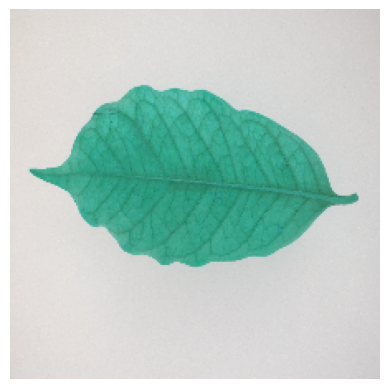

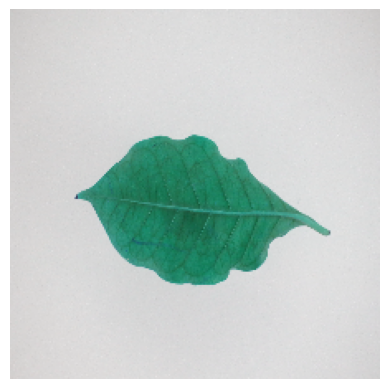

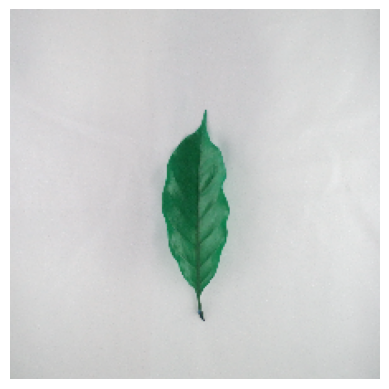

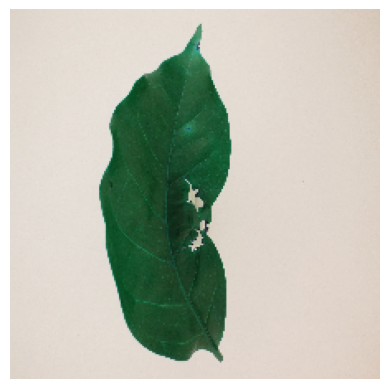

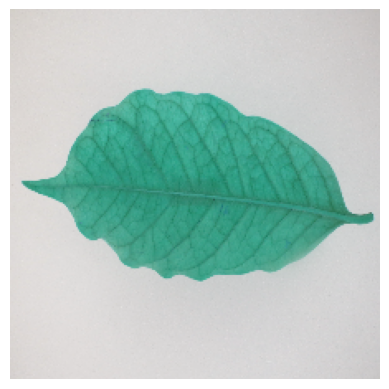

In [12]:
for i in range(5):
    plt.imshow(images[i], cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.axis('off')  # Hide axis
    plt.show()

In [13]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

def create_mobilenetv2_model(input_shape, num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

mobilenetv2_model = create_mobilenetv2_model(input_shape=(224, 224, 3), num_classes=num_classes)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_custom_cnn(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

custom_cnn_model = create_custom_cnn(input_shape=(224, 224, 3), num_classes=num_classes)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define callbacks for MobileNetV2 model
callbacks_mobilenetv2 = [
    ModelCheckpoint('mobilenetv2_best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max'),
    EarlyStopping(monitor='val_accuracy', mode='max', patience=10, verbose=1)
]

# Train MobileNetV2 model
history_mobilenetv2 = mobilenetv2_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=callbacks_mobilenetv2
)

# Define callbacks for Custom CNN model
callbacks_custom_cnn = [
    ModelCheckpoint('custom_cnn_best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max'),
    EarlyStopping(monitor='val_accuracy', mode='max', patience=10, verbose=1)
]

# Train Custom CNN model
history_custom_cnn = custom_cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=callbacks_custom_cnn
)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 33s 969ms/step - accuracy: 0.3343 - loss: 2.5927 - val_accuracy: 0.5545 - val_loss: 1.4104
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 862ms/step - accuracy: 0.5643 - loss: 1.1875 - val_accuracy: 0.5396 - val_loss: 1.2556
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 871ms/step - accuracy: 0.6166 - loss: 1.0316 - val_accuracy: 0.5495 - val_loss: 1.2920
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 870ms/step - accuracy: 0.6864 - loss: 0.8260 - val_accuracy: 0.5545 - val_loss: 1.2916
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 857ms/step - accuracy: 0.7069 - loss: 0.8049 - val_accuracy: 0.5941 - val_loss: 1.1986
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 866ms/step - accuracy: 0.7228 - loss: 0.7736 - val_accuracy: 0.5594 - val_loss: 1.3727
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 869ms/step - accuracy: 0.6986 - loss: 0.7516 - val_accuracy: 0.5891 - val_loss: 1.2962
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 853ms/step - accuracy: 0.7328 - loss: 0.7295 - val_accuracy: 0.509

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 562ms/step - accuracy: 0.5596 - loss: 1.2627
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 424ms/step - accuracy: 0.6096 - loss: 1.2836
MobileNetV2 - Loss: 1.1986019611358643, Accuracy: 0.594059407711029
Custom CNN - Loss: 1.2814369201660156, Accuracy: 0.594059407711029


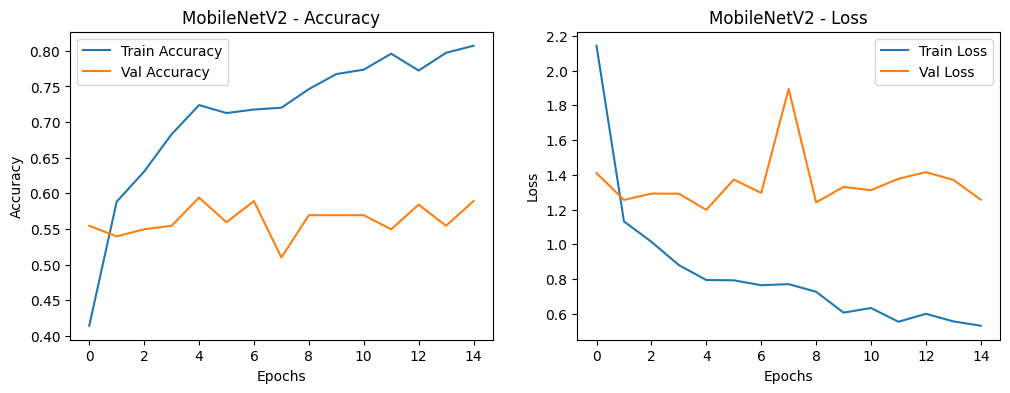

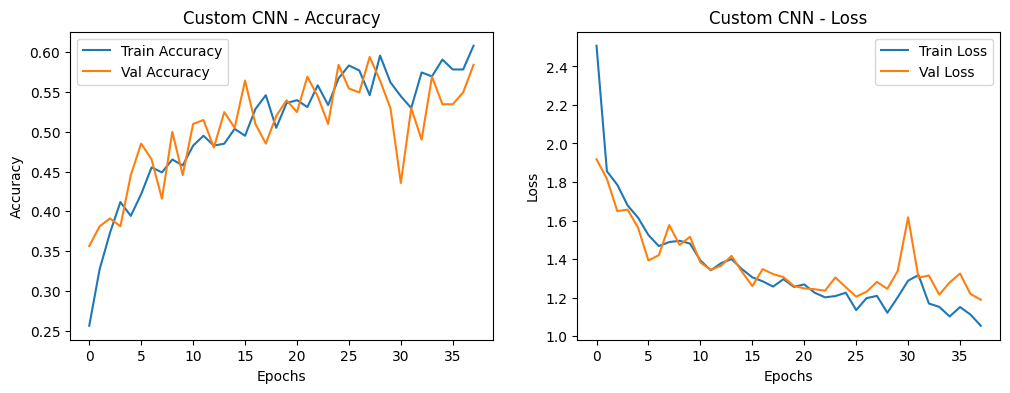

In [18]:
import matplotlib.pyplot as plt

# Load the best models
mobilenetv2_model.load_weights('mobilenetv2_best_model.keras')
custom_cnn_model.load_weights('custom_cnn_best_model.keras')

# Evaluate the models
mobilenetv2_eval = mobilenetv2_model.evaluate(X_val, y_val)
custom_cnn_eval = custom_cnn_model.evaluate(X_val, y_val)

print(f'MobileNetV2 - Loss: {mobilenetv2_eval[0]}, Accuracy: {mobilenetv2_eval[1]}')
print(f'Custom CNN - Loss: {custom_cnn_eval[0]}, Accuracy: {custom_cnn_eval[1]}')

# Plot the training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

plot_history(history_mobilenetv2, 'MobileNetV2')
plot_history(history_custom_cnn, 'Custom CNN')


# Overfitting:
**Indication of Overfitting: MobileNetv2**
The training accuracy increases consistently while the validation accuracy does not show a similar improvement. This divergence suggests that the model is overfitting the training data. The model performs well on the training data but fails to generalize to unseen validation data.
The fluctuation in validation loss further supports the presence of overfitting, as the model struggles to perform consistently on the validation set.



# CustomCNN: 
# **Comparison with MobileNetV2:**
Overfitting:

The Custom CNN model shows less overfitting compared to MobileNetV2. This is evident from the closer alignment of training and validation accuracy/loss curves.
The validation accuracy and loss curves follow the training curves more closely, suggesting better generalization.
Fluctuations:

Both accuracy and loss graphs exhibit significant fluctuations, especially in the validation curves. This could be due to the small size of the dataset, variability in the data, or the need for further hyperparameter tuning.


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import cv2
import os

# Define dataset paths
dataset_path = '/kaggle/input/coffee-leaf-disease-akash/CoLeaf DATASET'
categories = os.listdir(dataset_path)
num_classes = len(categories)

# Load images and labels
def load_data():
    images = []
    labels = []
    for label, category in enumerate(categories):
        category_path = os.path.join(dataset_path, category)
        for root, _, files in os.walk(category_path):
            for img_name in files:
                img_path = os.path.join(root, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (224, 224))  # Resize images to 224x224
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Failed to load image: {img_path}")
    return np.array(images), np.array(labels)

images, labels = load_data()

# Ensure that we have loaded images
if len(images) == 0:
    raise Exception("No images loaded. Check dataset path and image files.")

# Normalize the pixel values
images = images / 255.0

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode='nearest'
)

# Define the MobileNetV2 model with regularization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

def create_mobilenetv2_model(input_shape, num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Regularization
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Implementing K-fold Cross-Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold_no = 1

for train_index, val_index in kf.split(images):
    print(f'Training on fold {fold_no}...')
    X_train, X_val = images[train_index], images[val_index]
    y_train, y_val = labels[train_index], labels[val_index]
    
    mobilenetv2_model = create_mobilenetv2_model(input_shape=(224, 224, 3), num_classes=num_classes)
    
    # Define callbacks
    callbacks = [
        ModelCheckpoint(f'mobilenetv2_best_model_fold_{fold_no}.keras', save_best_only=True, monitor='val_accuracy', mode='max'),
        EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1)
    ]
    
    # Train the model
    history = mobilenetv2_model.fit(
        datagen.flow(X_train, y_train, batch_size=32),
        validation_data=(X_val, y_val),
        epochs=10,
        callbacks=callbacks
    )
    
    # Evaluate the model
    scores = mobilenetv2_model.evaluate(X_val, y_val, verbose=0)
    print(f'Score for fold {fold_no}: {mobilenetv2_model.metrics_names[0]} of {scores[0]}; {mobilenetv2_model.metrics_names[1]} of {scores[1]}')
    
    fold_no += 1


Training on fold 1...
Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.2785 - loss: 2.4902 - val_accuracy: 0.4851 - val_loss: 1.3196
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5029 - loss: 1.5274 - val_accuracy: 0.4970 - val_loss: 1.4902
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5734 - loss: 1.2204 - val_accuracy: 0.5476 - val_loss: 1.2067
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6301 - loss: 1.0401 - val_accuracy: 0.6042 - val_loss: 1.1130
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6296 - loss: 1.0687 - val_accuracy: 0.6042 - val_loss: 1.1489
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6557 - loss: 0.9239 - val_accuracy: 0.5208 - val_loss: 1.3337
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6604 - loss: 0.8804 - val_accuracy: 0.5536 - val_loss: 1.2472
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6460 - loss: 0.9514 - val_accura

In [24]:
def create_mobilenetv2_model(input_shape, num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Regularization
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Implementing K-fold Cross-Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold_no = 1

for train_index, val_index in kf.split(images):
    print(f'Training on fold {fold_no}...')
    X_train, X_val = images[train_index], images[val_index]
    y_train, y_val = labels[train_index], labels[val_index]
    
    mobilenetv2_model = create_mobilenetv2_model(input_shape=(224, 224, 3), num_classes=num_classes)
    
    # Define callbacks
    callbacks = [
        ModelCheckpoint(f'mobilenetv2_best_model_fold_{fold_no}.keras', save_best_only=True, monitor='val_accuracy', mode='max'),
        EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1)
    ]
    
    # Train the model with a larger batch size
    history = mobilenetv2_model.fit(
        datagen.flow(X_train, y_train, batch_size=64),  # Increased batch size
        validation_data=(X_val, y_val),
        epochs=15,
        callbacks=callbacks
    )
    
    # Evaluate the model
    scores = mobilenetv2_model.evaluate(X_val, y_val, verbose=0)
    print(f'Score for fold {fold_no}: {mobilenetv2_model.metrics_names[0]} of {scores[0]}; {mobilenetv2_model.metrics_names[1]} of {scores[1]}')
    
    fold_no += 1


Training on fold 1...
Epoch 1/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.2325 - loss: 3.0433 - val_accuracy: 0.3690 - val_loss: 1.7700
Epoch 2/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.4359 - loss: 1.6596 - val_accuracy: 0.5357 - val_loss: 1.3156
Epoch 3/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5425 - loss: 1.2880 - val_accuracy: 0.5536 - val_loss: 1.2219
Epoch 4/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6048 - loss: 1.1244 - val_accuracy: 0.5506 - val_loss: 1.2260
Epoch 5/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6167 - loss: 1.1863 - val_accuracy: 0.5565 - val_loss: 1.2025
Epoch 6/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6177 - loss: 1.0407 - val_accuracy: 0.5357 - val_loss: 1.2340
Epoch 7/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6280 - loss: 0.9783 - val_accuracy: 0.5536 - val_loss: 1.1117
Epoch 8/15
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.6696 - loss: 0.9062 - val_accura